## Predicting the Length of Stay in Hospital among Schizophrenic and Other Psychotic Disorders Patients Using Machine Learning

**Introduction**

The length of hospital stay (LOS) is a critical measure in healthcare, particularly in psychiatry, as it impacts both the quality of care and resource allocation. The length of stay is defined as: 	
**"The total number of patient days at an acute level and/or other than acute care level (excluding leave of absence days)"**.
Prolonged hospitalizations among patients with schizophrenia and psychotic disorders can increase healthcare costs and affect patients' mental health outcomes. This project aims to apply machine learning techniques to predict the LOS of such patients, enabling healthcare professionals to manage resources and develop personalized discharge plans proactively.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

In [4]:
# Loading the dataset
file_path = '/Users/shubray/Desktop/Hospital_Inpatient_Discharges.csv'

In [6]:
data = pd.read_csv(file_path, low_memory=False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [10]:
data.shape

(2135260, 33)

In [12]:
# Missing data percentage
print(data.isnull().sum() / len(data) * 100)

Hospital Service Area                   0.244186
Hospital County                         0.244186
Operating Certificate Number            0.312046
Permanent Facility Id                   0.244186
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     1.884829
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
Discharge Year                          0.000000
CCSR Diagnosis Code                     0.000000
CCSR Diagnosis Description              0.000000
CCSR Procedure Code                    27.312224
CCSR Procedure Description             27.312224
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code        

In [14]:
# Drop irrelevant columns and excessive missing values
data = data.drop(['Birth Weight','Payment Typology 2','Payment Typology 3','CCSR Procedure Code', 'Operating Certificate Number', 'Emergency Department Indicator'], axis=1)

In [16]:
data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Total Charges,Total Costs
0,New York City,Bronx,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,27,...,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,320922.43,60241.34
1,New York City,Bronx,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,4,...,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,61665.22,9180.69
2,New York City,Bronx,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,2,...,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,42705.34,11366.50
3,New York City,Bronx,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,5,...,KIDNEY AND URINARY TRACT INFECTIONS,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicare,72700.17,12111.75
4,New York City,Bronx,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,3,...,OTHER DISORDERS OF NERVOUS SYSTEM,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Medicare,55562.51,8339.72


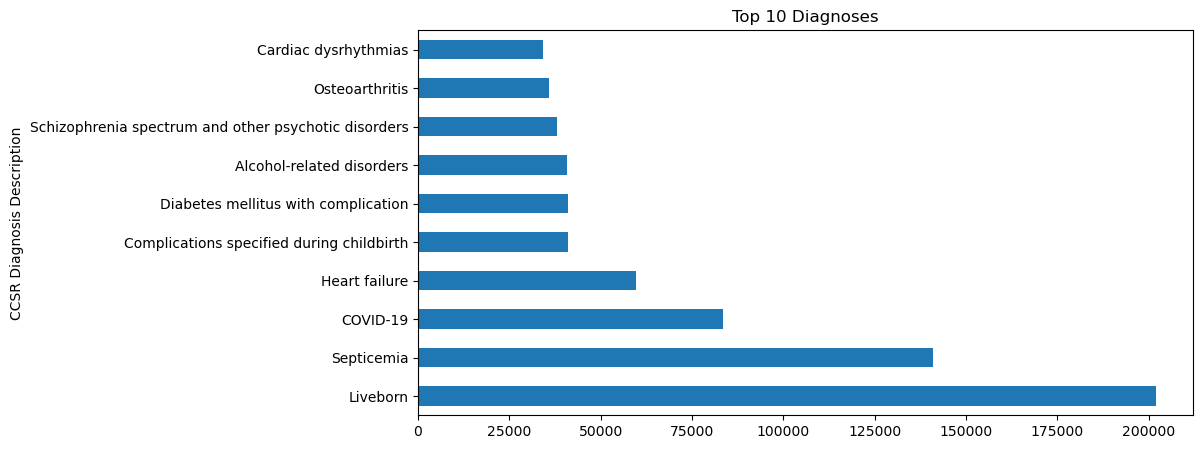

In [18]:
# plotting top 10 diagnosis
data['CCSR Diagnosis Description'].value_counts().head(10).plot(kind='barh', title='Top 10 Diagnoses', figsize=(10,5));

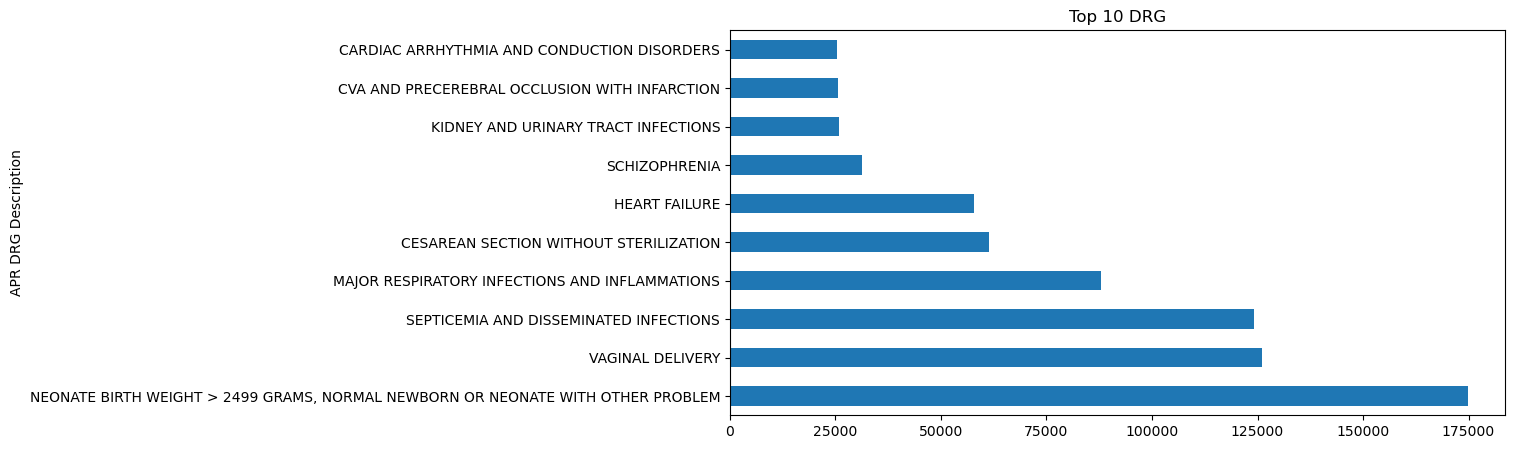

In [20]:
# plotting top 10 diagnosis related group 
data['APR DRG Description'].value_counts().head(10).plot(kind='barh', title='Top 10 DRG', figsize=(10,5));

In [22]:
# Selecting rows where the 'CCSR Diagnosis Description' is 'Schizophrenia and other psychotic disorders'
sch_data = data[data['CCSR Diagnosis Description'] == 'Schizophrenia spectrum and other psychotic disorders']

In [24]:
sch_data.reset_index(drop=True, inplace=True)
sch_data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Total Charges,Total Costs
0,New York City,Kings,1294.0,Coney Island Hospital,30 to 49,NaN,M,Other Race,Unknown,24,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Moderate,Medical,Medicare,97625.72,44612.90
1,New York City,Manhattan,1438.0,Bellevue Hospital Center,50 to 69,OOS,M,Black/African American,Unknown,1,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Self-Pay,6051.00,3479.83
2,New York City,Bronx,1165.0,Jacobi Medical Center,18 to 29,104,M,Other Race,Not Span/Hispanic,1,...,MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPEC...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,6457.61,3832.84
3,New York City,Kings,1692.0,Woodhull Medical & Mental Health Center,30 to 49,112,M,Black/African American,Not Span/Hispanic,1,...,MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPEC...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,5504.58,3751.86
4,Hudson Valley,Rockland,776.0,Montefiore Nyack,50 to 69,109,M,Black/African American,Not Span/Hispanic,9,...,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Private Health Insurance,54640.76,14877.09


In [26]:
sch_data.dtypes

Hospital Service Area                   object
Hospital County                         object
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCSR Diagnosis Code                     object
CCSR Diagnosis Description              object
CCSR Procedure Description              object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code             int64
APR Severity 

In [28]:
# Select numerical columns in sch_data
num_col_sch = sch_data.select_dtypes(include=['int64', 'float64'])

# Check for missing values in numerical columns
missing_values_num_sch = num_col_sch.isnull().sum()

# Filter columns that have missing values
missing_values_num_sch = missing_values_num_sch[missing_values_num_sch > 0]

# fill missing values in numerical columns with median
sch_data.loc[:, num_col_sch.columns] = num_col_sch.fillna(num_col_sch.median())


In [30]:
# Select categorical columns in sch_data
cat_col_sch = sch_data.select_dtypes(include=['object', 'category'])

# Check for missing values in categorical columns
missing_values_cat_sch = cat_col_sch.isnull().sum()

# Filter columns that have missing values
missing_values_cat_sch = missing_values_cat_sch[missing_values_cat_sch > 0]



### Encoding Categorical Variables

In [33]:
# convert categorical variables into numerical and fill missing values
for label, content in sch_data.items():
    if not pd.api.types.is_numeric_dtype(content):  # Check if the column is not numeric
        # Use .loc to modify the DataFrame and fill in categorical codes
        sch_data.loc[:, label] = pd.Categorical(content).codes + 1  # Adding +1 to avoid negative values for NaN categories

In [35]:
sch_data.isna().sum()

Hospital Service Area                  0
Hospital County                        0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
CCSR Procedure Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Payment Typology

### Exploratory Data Analysis

In [38]:
# Select columns that are relevant for Schizophrenia and Length of Stay
rel_col = [
    'Length of Stay','Age Group','Gender','Race', 'Ethnicity','APR Severity of Illness Description','APR DRG Description','APR Risk of Mortality'
]

In [40]:
# Create a subset DataFrame with only the relevant columns
sch_data_rel = sch_data[rel_col]

In [42]:
sch_data_rel.head()

,Length of Stay,Age Group,Gender,Race,Ethnicity,APR Severity of Illness Description,APR DRG Description,APR Risk of Mortality
0,38,3,2,3,4,4,8,4
1,1,4,2,1,4,4,8,3
2,1,2,2,3,2,4,4,3
3,1,3,2,1,2,4,4,3
4,110,4,2,1,2,4,8,3


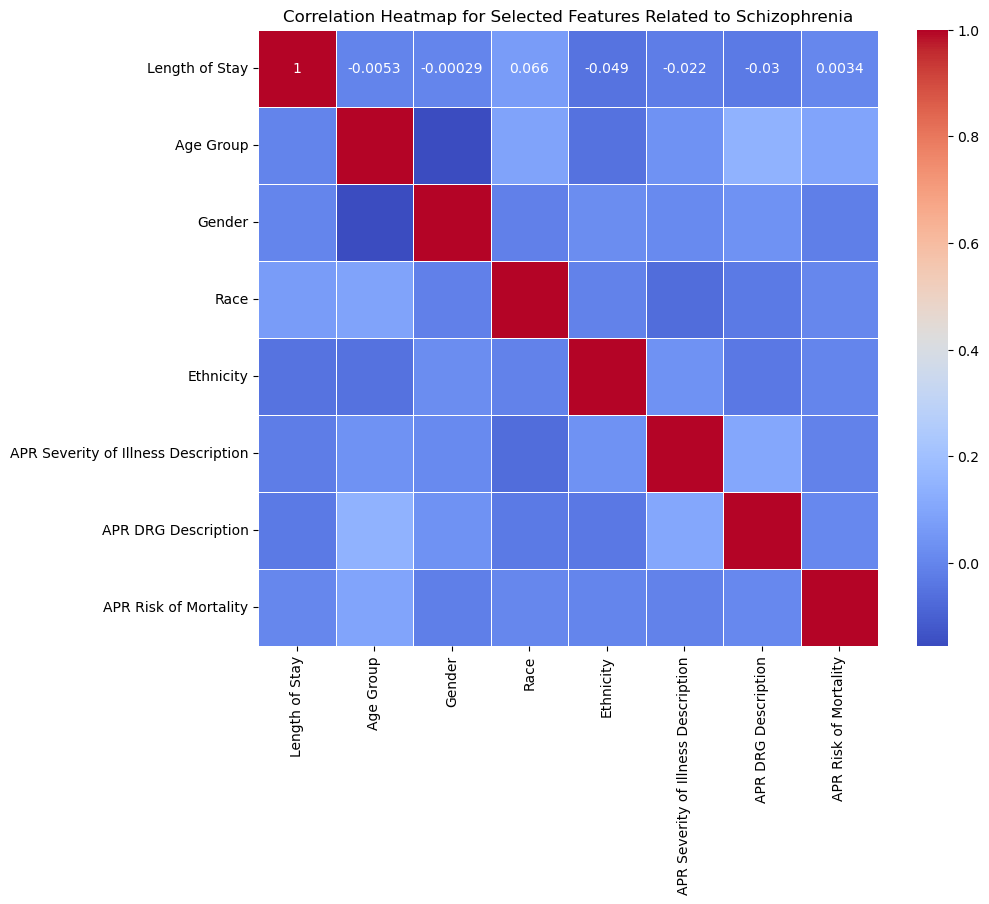

In [44]:
# Calculate the correlation matrix
corr_matrix = sch_data_rel.corr()

# Plot the heatmap for the selected columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Features Related to Schizophrenia")
plt.show()

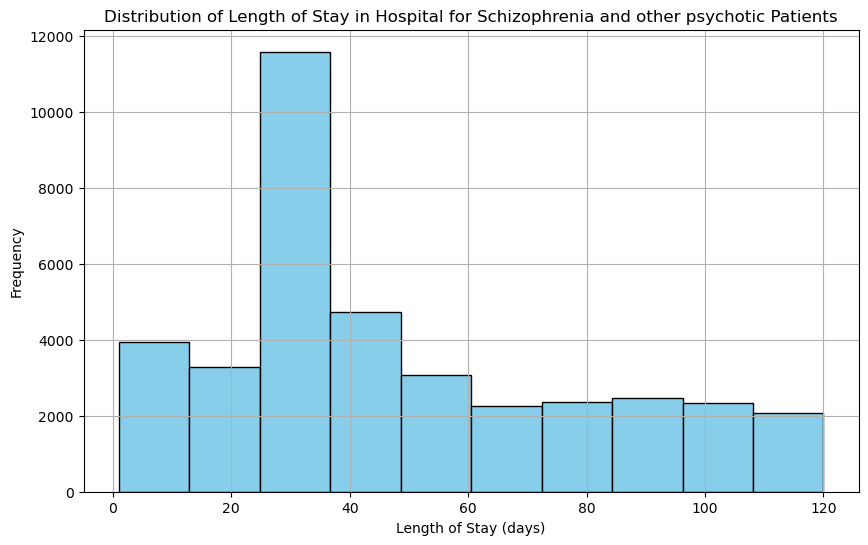

In [46]:
# Create a histogram of Length of Stay in the schizophrenia dataset
plt.figure(figsize=(10,6))
plt.hist(sch_data['Length of Stay'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Length of Stay in Hospital for Schizophrenia and other psychotic Patients')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Modeling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [51]:
# putting models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
         }

In [53]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}  # Dictionary to store model names and their scores

    # Looping through each model in the models dictionary
    for name, model in models.items():
        # Fitting the model to the training data
        model.fit(x_train, y_train)
        
        # Evaluating the model on the test data and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores


In [55]:
# splitting the data into X and y
x = sch_data.drop('Length of Stay', axis = 1)
y = sch_data['Length of Stay']

In [57]:
# splitting data into train and test set

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30424, 26), (30424,), (7606, 26), (7606,))

In [61]:
# scalling the data

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
%%time
scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
scores

CPU times: user 12.6 s, sys: 1.43 s, total: 14 s
Wall time: 12.2 s


{'Linear Regression': 0.024362445126672072,
 'DecisionTree Regressor': 0.5468193148419038,
 'Random Forest': 0.7581216857913454,
 'gradientboosting': 0.4062049058495799}

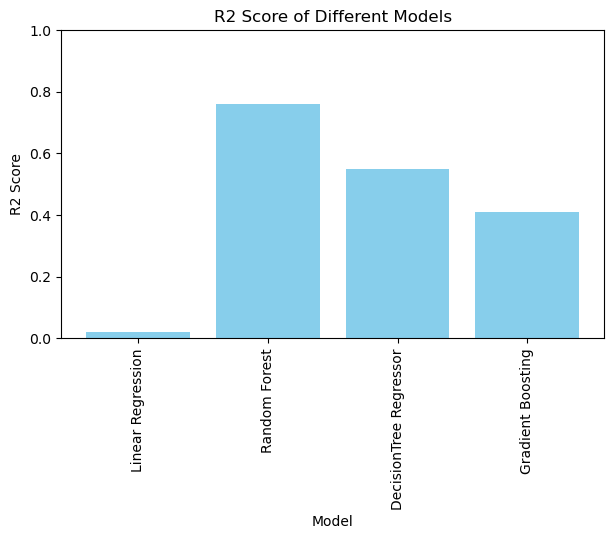

In [65]:
# Assuming `scores` is a dictionary with model names as keys and R2 scores as values
scores = {
    'Linear Regression': 0.02,
    'Random Forest': 0.76,
    'DecisionTree Regressor': 0.55,
    'Gradient Boosting': 0.41
}

# Plotting the R2 scores using matplotlib
plt.figure(figsize=(7, 4))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Score of Different Models")
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

In [67]:
# Define features and target variable
X = sch_data.drop(['Length of Stay'], axis=1)
y = sch_data['Length of Stay']

# Split the data into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Initialize and train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 24.980089255798774, MSE: 921.7485618998938, RMSE: 30.360312282647783


In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Decision Tree Regressor with default parameters
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate evaluation metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5

# Display results
print(f"Decision Tree Regressor MAE: {mae_tree}")
print(f"Decision Tree Regressor MSE: {mse_tree}")
print(f"Decision Tree Regressor RMSE: {rmse_tree}")

Decision Tree Regressor MAE: 7.464238758874573
Decision Tree Regressor MSE: 426.0311596108335
Decision Tree Regressor RMSE: 20.6405222707865


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

# Display results
print(f"Random Forest Regressor MAE: {mae_rf}")
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Random Forest Regressor RMSE: {rmse_rf}")

Random Forest Regressor MAE: 6.838319406358388
Random Forest Regressor MSE: 229.752576783966
Random Forest Regressor RMSE: 15.157591391245708


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Gradient Boosting Regressor with default parameters
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

# Display results
print(f"Gradient Boosting Regressor MAE: {mae_gb}")
print(f"Gradient Boosting Regressor MSE: {mse_gb}")
print(f"Gradient Boosting Regressor RMSE: {rmse_gb}")

Gradient Boosting Regressor MAE: 16.97461946079102
Gradient Boosting Regressor MSE: 560.9843109683987
Gradient Boosting Regressor RMSE: 23.685107366621725


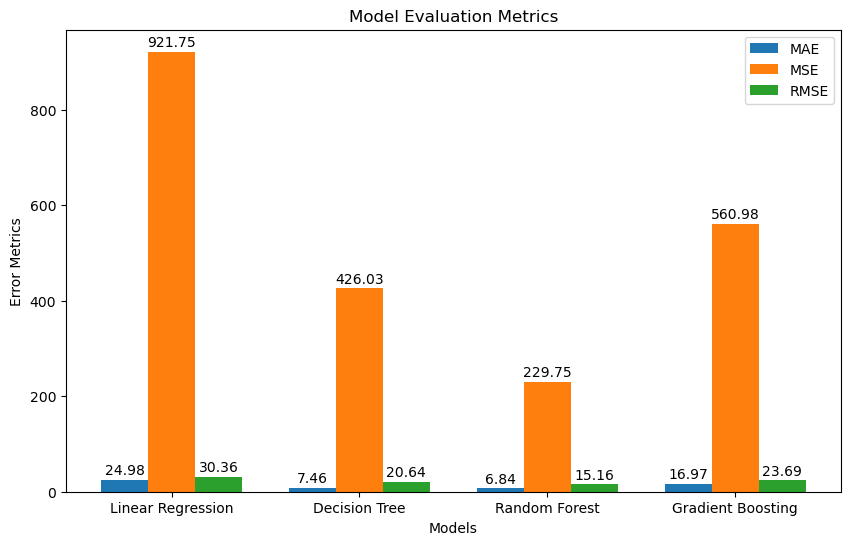

In [73]:
# Define the metrics for each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mae_scores = [24.98, 7.46, 6.84, 16.97]
mse_scores = [921.75, 426.03, 229.75, 560.98]
rmse_scores = [30.36, 20.64, 15.16, 23.69]

# Define the position of the bars on the x-axis
x = np.arange(len(models))

# Define the width of each bar
width = 0.25

# Plot each metric
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, mae_scores, width, label='MAE')
bar2 = ax.bar(x, mse_scores, width, label='MSE')
bar3 = ax.bar(x + width, rmse_scores, width, label='RMSE')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Error Metrics')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the values on top of the bars for clarity
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.show()


### Hyperparameter Tuning

Since Random Forest has the highest R² score here, hypertuning this model can further enhance its performance. Also, Gradient Boosting also has potential to improve its accuracy.

### Retrieve Best Parameters and Evaluate

After fitting the RandomizedSearchCV, now I can retrieve the best hyperparameters and evaluate the optimized models on my test set.

In [84]:
from sklearn.model_selection import RandomizedSearchCV
# parameter grid for Random Forest 
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'] 
}

In [88]:
# parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

In [90]:
# Initialize models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [94]:
# RandomizedSearchCV for Random Forest and Gradient Boosting
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20, 
    cv=3,      
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [96]:
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [98]:
# Fit models on the training data
rf_random_search.fit(X_train, y_train)  # Replace with X_sample, y_sample if sampling
gb_random_search.fit(X_train, y_train)  # Replace with X_sample, y_sample if sampling

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [100]:
# Best parameters for Random Forest and Gradient Boosting
print("Best Random Forest parameters:", rf_random_search.best_params_)
print("Best Gradient Boosting parameters:", gb_random_search.best_params_)

Best Random Forest parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Gradient Boosting parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}


In [102]:
# Best score achieved with those parameters (negative MSE in this case)
print("Best Random Forest score (neg MSE):", rf_random_search.best_score_)
print("Best Gradient Boosting score (neg MSE):", gb_random_search.best_score_)

Best Random Forest score (neg MSE): -301.9145270094732
Best Gradient Boosting score (neg MSE): -370.4018860173433


In [104]:
# Get the best models
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_

In [106]:
# Predict and evaluate on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

In [108]:
# Random Forest performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
print(f"Tuned Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}")

Tuned Random Forest - MAE: 9.156329871154352, MSE: 280.1245357438577, RMSE: 16.736921334100177


In [110]:
# Gradient Boosting performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
print(f"Tuned Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}")

Tuned Gradient Boosting - MAE: 11.438355859768228, MSE: 347.59518348294097, RMSE: 18.64390472736173


In [120]:
# Assuming best_rf_model is the tuned Random Forest model and X_test is the test data
preds = best_rf_model.predict(X_test)  # Generate predictions with Random Forest

# Calculate absolute error for each prediction
absolute_error = abs(y_test - preds)

# Create the DataFrame
los_comparison_df = pd.DataFrame({
    "Actual Length of Stay": y_test,
    "Predicted Length of Stay": preds,
    "Absolute Error": absolute_error
})

los_comparison_df.reset_index(drop=True, inplace=True)
los_comparison_df.head (10) 


,Actual Length of Stay,Predicted Length of Stay,Absolute Error
0,26,25.0550,0.945
1,2,74.5400,72.54
2,86,73.5650,12.435
3,99,84.2300,14.77
4,88,79.7475,8.2525
5,58,57.6550,0.345
6,29,31.4600,2.46
7,99,68.1900,30.81
8,27,34.1100,7.11
9,88,76.3300,11.67


In [138]:
# Define a threshold for "close" predictions, e.g., 10 days
threshold = 10

# Count the number of cases where the Absolute Error is within the threshold
close_predictions = los_comparison_df[los_comparison_df["Absolute Error"] <= threshold].shape[0]

# Calculate the percentage of close predictions
total_predictions = los_comparison_df.shape[0]
percentage_close = (close_predictions / total_predictions) * 100

print(f"Number of close predictions (within {threshold} days): {close_predictions}")
print(f"Percentage of close predictions: {percentage_close:.2f}%")


Number of close predictions (within 10 days): 5576
Percentage of close predictions: 73.31%


### Conclusion

The Tuned Random Forest model is the best for predicting LOS, with lower MAE, MSE, and RMSE values across the board compared to Gradient Boosting.
Interpretation of Metrics: These metrics indicate that the Random Forest model provides more accurate predictions with an average error of about 9-17 days. Although this is a good level of performance, there is still room for improvement, especially if further reduction in days is desirable. 5,576 predictions (73.31%) of the model’s predictions were within 10 days of the actual Length of Stay (LOS).
This high percentage of close predictions demonstrates that the model performs reasonably well for the majority of cases, capturing the LOS accurately within a 10-day margin.
This result implies that the Random Forest model will generally provide reliable LOS predictions within this error range, which may assist healthcare professionals in planning resources and discharge schedules more accurately than with the Gradient Boosting model.